# MTA Data - Metis 01 Project Benson

In [1]:
%matplotlib inline
from __future__ import division
import csv
import os
import calendar
import datetime
import matplotlib.pyplot as plt
from collections import Counter

## Objective
I was curious about where people are going at off-peak times. The goal for this project is to find the areas of New York with the most active nightlife. As a baseline, we will compare weekends to weeknights.

First, read in the data. Then create a dictionary in which the keys are station identifiers and the values are everything else.

In [2]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150404.txt

In [3]:
mta_dict = {}

filedir = './mta_data/'
filenames = sorted(next(os.walk(filedir))[2])

for nextfile in filenames:
    with open(filedir + nextfile, mode='r') as infile:
        reader = csv.reader(infile)
        readrows = [[cell.strip() for cell in row] for row in reader]

    assert readrows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                           'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                           'EXITS']

    for row in readrows:
        mta_dict.setdefault(tuple(row[:4]),[]).append(tuple(row[4:]))
    
    print filedir+nextfile + ' imported successfully'

./mta_data/turnstile_150404.txt imported successfully
./mta_data/turnstile_150411.txt imported successfully
./mta_data/turnstile_150418.txt imported successfully
./mta_data/turnstile_150425.txt imported successfully
./mta_data/turnstile_150502.txt imported successfully
./mta_data/turnstile_150509.txt imported successfully
./mta_data/turnstile_150516.txt imported successfully
./mta_data/turnstile_150523.txt imported successfully
./mta_data/turnstile_150530.txt imported successfully
./mta_data/turnstile_150606.txt imported successfully
./mta_data/turnstile_150613.txt imported successfully
./mta_data/turnstile_150620.txt imported successfully
./mta_data/turnstile_150627.txt imported successfully


In [4]:
len(mta_dict.items())

4583

In [5]:
# raw_readings.items()[0]

## Time Series
Extract time information and count numbers from dictionary values for turnstile exits.

Filter out values that are negative or seem unreasonably large.

In [6]:
def accum_by_datetime(dct):
    d = {turnstile: [(datetime.datetime.strptime(date + time,
                                        '%m/%d/%Y%X'),
                                        int(out_cumulative))
                                       for _, _, date, time,
                                           _, _, out_cumulative in rows]
                           for turnstile, rows in dct.items()}
    return d

datetime_cumulative = accum_by_datetime(mta_dict)

In [7]:
#datetime_cumulative.items()[0]

In [8]:
def count_by_datetime(dct):
    d = {turnstile: [[rows[i][0],
                     rows[i+1][1] - rows[i][1],
                     rows[i+1][0] - rows[i][0]]
                    for i in range(len(rows) - 1)]
        for turnstile, rows in dct.items()}
    return d

datetime_count_times = count_by_datetime(datetime_cumulative)

In [9]:
print len(datetime_count_times.items())
# datetime_count_times.items()[0]

4583


In [10]:
def sort_by_value(dct):
    dlist = sorted(dct.items(), key=lambda tup: tup[-1], reverse=True)
    return dlist

In [11]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()

print all_counts[-200:]

[3678, 3680, 3680, 3683, 3690, 3695, 3695, 3697, 3699, 3708, 3714, 3715, 3723, 3725, 3728, 3730, 3735, 3751, 3751, 3752, 3753, 3754, 3755, 3761, 3764, 3775, 3780, 3782, 3787, 3804, 3806, 3825, 3832, 3833, 3834, 3838, 3840, 3840, 3841, 3856, 3864, 3888, 3893, 3910, 3912, 3914, 3927, 3939, 3942, 3953, 3964, 3964, 3966, 3968, 3993, 3994, 4000, 4004, 4006, 4017, 4021, 4026, 4027, 4029, 4031, 4033, 4036, 4044, 4044, 4056, 4062, 4064, 4084, 4090, 4104, 4110, 4111, 4118, 4122, 4123, 4128, 4140, 4147, 4148, 4150, 4150, 4154, 4154, 4166, 4169, 4182, 4182, 4204, 4206, 4206, 4207, 4209, 4217, 4239, 4263, 4281, 4292, 4299, 4319, 4333, 4336, 4363, 4386, 4426, 4438, 4477, 4504, 4515, 4519, 4530, 4540, 4550, 4634, 4776, 4791, 4802, 4840, 5219, 5391, 5439, 5497, 5918, 6156, 6696, 6814, 7332, 8059, 9431, 9574, 9949, 10189, 11763, 15051, 39544, 46022, 65261, 75636, 79906, 80097, 80123, 80229, 80396, 83050, 95375, 95456, 137504, 137512, 137627, 195187, 195187, 312439, 322327, 323893, 472911, 806802, 1041

In [12]:
## investigate high values

# for key, rows in datetime_count_times.items():
#     for _, count, _ in rows:
#         if count >= 39544:
#             print count, key

In [13]:
print all_counts[:50]

[-2080392237, -1376238516, -1056964595, -985959134, -250683223, -83930712, -33568330, -16754739, -16754517, -14090237, -11113480, -8172201, -8126408, -7645885, -7231960, -7136820, -6188433, -6119245, -5748960, -5713849, -5465194, -5179240, -5008747, -4331551, -4202565, -4018906, -3967127, -3549171, -3544654, -3536673, -3003243, -2962971, -2698086, -2533024, -2377006, -2376873, -2131420, -2112369, -1669794, -1617237, -1540092, -1532280, -1473817, -1393821, -1334500, -1212364, -1103455, -1102179, -1089287, -1078401]


In [14]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 2299978), (4.2, 140012), (8.0, 2780), (4.433333333333334, 2217), (0.02222222222222222, 1391), (0.022500000000000003, 719), (0.23333333333333334, 264), (0.02277777777777778, 231), (4.199722222222222, 153), (3.999722222222222, 131)]


In [15]:
def filter_outliers(dct):
    d = {turnstile: [(time, count)
                   for (time, count, _) in rows
                   if 0 <= count <= 65000]
       for turnstile, rows in dct.items()}
    return d
    
datetime_counts = filter_outliers(datetime_count_times)

In [16]:
#datetime_counts.items()[0]

In [17]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)

0.995578958185


In [18]:
all_good_counts.sort()
print all_good_counts[-5:]

[10189, 11763, 15051, 39544, 46022]


In [19]:
print all_good_counts[:5]

[0, 0, 0, 0, 0]


## Separate by Weeknights and Weekends
Instead of daily entries, we want nighttime/latenight counts (8pm-4am) for weeknight (Mon-Wed) and weekend (Fri-Sat). 

We questioned whether Thursday should be considered weeknight or weekend. Many New Yorkers go out on Thursday nights and treat it like a weekend, but we would still be capturing commuters, as well, so this number feels like it could go either way. We decided to exclude it for this comparison.

We excluded Sunday because we felt it would throw off the baseline.

In [20]:
# datetime_counts.items()[0]

In [21]:
# experimenting with datetime objects

time = datetime.datetime(2015, 5, 1, 3, 0)
time.year, time.month, time.day, time.hour, time.minute

if 0 <= time.hour <=4:
    time = time - datetime.timedelta(days=1)
    
time

datetime.datetime(2015, 4, 30, 3, 0)

In [22]:
def filter_for_night(dct):
    d = {turnstile: [(time, count)
                     for (time, count) in rows
                     if time.hour <= 4 or time.hour >= 20]
         for turnstile, rows in dct.items()}
    return d

nighttime_counts = filter_for_night(datetime_counts)

In [23]:
# nighttime_counts.items()[0]

In [24]:
def filter_weeknight(dct):
    d = {turnstile: [(time, count)
                     for (time, count) in rows
                     if (time.weekday() == 0 and time.hour >= 20)
                     or 0 < time.weekday() < 3
                     or (time.weekday() == 3 and time.hour <=4)]
         for turnstile, rows in dct.items()}
    return d

weeknight_counts = filter_weeknight(nighttime_counts)

In [25]:
# weeknight_counts.items()[0]

In [26]:
def filter_weekend(dct):
    d = {turnstile: [(time, count)
                     for (time, count) in rows
                     if (time.weekday() == 4 and time.hour >= 20)
                     or time.weekday() == 5
                     or (time.weekday() == 6 and time.hour <=4)]
         for turnstile, rows in dct.items()}
    return d

weekend_counts = filter_weekend(nighttime_counts)

In [27]:
# weekend_counts.items()[0]

In [28]:
# change day of midnight to 4am counts so that it is included in the previous day

def reassign_latenight_days(dct):
    d = {}
    for turnstile, rows in dct.items():
        d.setdefault(turnstile, [])
        for time, count in rows:
            if time.hour <= 4:
                d[turnstile].append((time - datetime.timedelta(days = 1), count))
            else:
                d[turnstile].append((time, count))
    return d

new_weekend_counts = reassign_latenight_days(weekend_counts)
new_weeknight_counts = reassign_latenight_days(weeknight_counts)

In [29]:
# new_weeknight_counts.items()[0]

In [30]:
# new_weekend_counts.items()[0]

##Daily Exits
Accumulate exit counts for each day.

In [31]:
def count_by_day(dct):
    d = {}
    for turnstile, rows in dct.items():
        by_day = {}
        for time, count in rows:
            day = time.date()
            by_day[day] = by_day.get(day, 0) + count
        d[turnstile] = sorted(by_day.items())
    return d
        
daily_weekend_counts = count_by_day(new_weekend_counts)
daily_weeknight_counts = count_by_day(new_weeknight_counts)

In [32]:
# look at a random turnstile at Bowling Green

daily_weekend_counts[('R200A', 'R041', '01-00-00', 'BOWLING GREEN')]

[(datetime.date(2015, 3, 27), 67),
 (datetime.date(2015, 3, 28), 93),
 (datetime.date(2015, 4, 3), 131),
 (datetime.date(2015, 4, 4), 93),
 (datetime.date(2015, 4, 10), 129),
 (datetime.date(2015, 4, 11), 111),
 (datetime.date(2015, 4, 17), 143),
 (datetime.date(2015, 4, 18), 104),
 (datetime.date(2015, 4, 24), 131),
 (datetime.date(2015, 4, 25), 107),
 (datetime.date(2015, 5, 1), 149),
 (datetime.date(2015, 5, 2), 111),
 (datetime.date(2015, 5, 8), 75),
 (datetime.date(2015, 5, 9), 10),
 (datetime.date(2015, 5, 15), 109),
 (datetime.date(2015, 5, 16), 104),
 (datetime.date(2015, 5, 22), 129),
 (datetime.date(2015, 5, 23), 76),
 (datetime.date(2015, 5, 29), 157),
 (datetime.date(2015, 5, 30), 106),
 (datetime.date(2015, 6, 5), 127),
 (datetime.date(2015, 6, 6), 120),
 (datetime.date(2015, 6, 12), 131),
 (datetime.date(2015, 6, 13), 128),
 (datetime.date(2015, 6, 19), 146),
 (datetime.date(2015, 6, 20), 90)]

In [33]:
# look at another turnstile at Bowling Green

daily_weekend_counts[('R200A', 'R041', '01-00-04', 'BOWLING GREEN')]

[(datetime.date(2015, 3, 27), 16),
 (datetime.date(2015, 3, 28), 21),
 (datetime.date(2015, 4, 3), 22),
 (datetime.date(2015, 4, 4), 21),
 (datetime.date(2015, 4, 10), 29),
 (datetime.date(2015, 4, 11), 19),
 (datetime.date(2015, 4, 17), 30),
 (datetime.date(2015, 4, 18), 34),
 (datetime.date(2015, 4, 24), 36),
 (datetime.date(2015, 4, 25), 18),
 (datetime.date(2015, 5, 1), 27),
 (datetime.date(2015, 5, 2), 13),
 (datetime.date(2015, 5, 8), 11),
 (datetime.date(2015, 5, 9), 4),
 (datetime.date(2015, 5, 15), 31),
 (datetime.date(2015, 5, 16), 26),
 (datetime.date(2015, 5, 22), 42),
 (datetime.date(2015, 5, 23), 16),
 (datetime.date(2015, 5, 29), 35),
 (datetime.date(2015, 5, 30), 25),
 (datetime.date(2015, 6, 5), 36),
 (datetime.date(2015, 6, 6), 26),
 (datetime.date(2015, 6, 12), 26),
 (datetime.date(2015, 6, 13), 43),
 (datetime.date(2015, 6, 19), 34),
 (datetime.date(2015, 6, 20), 28)]

## Accumulate Counts by Station Area

So far we've been operating on a single turnstile level. Next we'll combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We will combine the numbers together for each ControlArea/UNIT/STATION combo, for each day, to get a count by station area.

In [34]:
# append all daily counts to a single station area

def combine_by_stationarea(dct):
    d = {}
    for turnstile, rows in dct.items():
        by_day = {}
        station = (turnstile[:2]) + (turnstile[3],)
        d[station] = d.get(station, [])
        for day, count in rows:
            by_day[day] = by_day.get(day, 0) + count
        for item in by_day.items():
            d[station].append(item)
        d[station] = sorted(d[station])
    return d

weekend_by_stationarea = combine_by_stationarea(daily_weekend_counts)
weeknight_by_stationarea = combine_by_stationarea(daily_weeknight_counts)

In [35]:
# reusable function for accumulating values by key

def accumulate_by_day(dct):
    d = {}
    for key, vals in dct.items():
        by_day = {}
        for day, count in vals:
            by_day[day] = by_day.get(day, 0) + count
        d[key] = sorted(by_day.items())
    return d
        
weekend_stationarea_counts = accumulate_by_day(weekend_by_stationarea)
weeknight_stationarea_counts = accumulate_by_day(weeknight_by_stationarea)

In [36]:
# look at a station area (a group of turnstiles) at Bowling Green

weekend_stationarea_counts[('R200A', 'R041', 'BOWLING GREEN')]

[(datetime.date(2015, 3, 27), 282),
 (datetime.date(2015, 3, 28), 463),
 (datetime.date(2015, 4, 3), 594),
 (datetime.date(2015, 4, 4), 439),
 (datetime.date(2015, 4, 10), 586),
 (datetime.date(2015, 4, 11), 503),
 (datetime.date(2015, 4, 17), 670),
 (datetime.date(2015, 4, 18), 499),
 (datetime.date(2015, 4, 24), 598),
 (datetime.date(2015, 4, 25), 458),
 (datetime.date(2015, 5, 1), 747),
 (datetime.date(2015, 5, 2), 463),
 (datetime.date(2015, 5, 8), 354),
 (datetime.date(2015, 5, 9), 98),
 (datetime.date(2015, 5, 15), 605),
 (datetime.date(2015, 5, 16), 429),
 (datetime.date(2015, 5, 22), 634),
 (datetime.date(2015, 5, 23), 426),
 (datetime.date(2015, 5, 29), 690),
 (datetime.date(2015, 5, 30), 527),
 (datetime.date(2015, 6, 5), 632),
 (datetime.date(2015, 6, 6), 504),
 (datetime.date(2015, 6, 12), 620),
 (datetime.date(2015, 6, 13), 565),
 (datetime.date(2015, 6, 19), 690),
 (datetime.date(2015, 6, 20), 450)]

In [37]:
# for key, val in weekend_by_stationarea.items():
#     if key[2] == 'BOYD-88 ST':
#         print sorted(val)
# print len(weekend_by_stationarea.values()[0])

## Counts by Station

Combine everything in each station, and come up with a time series for each STATION, by adding up all the turnstiles in a station.

In [38]:
len(weekend_stationarea_counts.items()), len(weeknight_stationarea_counts.items())

(729, 729)

In [39]:
# combine all of the counts at a station in a list

def combine_by_station(dct):
    d = {}
    for stationarea, rows in dct.items():
        by_day = {}
        station = (stationarea[-1],)
        d[station] = d.get(station, [])
        for day, count in rows:
            by_day[day] = by_day.get(day, 0) + count
        for item in by_day.items():
            d[station].append(item)
        d[station] = sorted(d[station])
    return d
            
weekend_by_station = combine_by_station(weekend_stationarea_counts)
weeknight_by_station = combine_by_station(weeknight_stationarea_counts)

In [40]:
# look at all station areas at Bowling Green. 
# There appear to be 3 sets of turnstiles since each day repeats 3 times.

weeknight_by_station[('BOWLING GREEN',)]

[(datetime.date(2015, 3, 30), 1427),
 (datetime.date(2015, 3, 30), 2086),
 (datetime.date(2015, 3, 30), 2347),
 (datetime.date(2015, 3, 31), 1422),
 (datetime.date(2015, 3, 31), 2278),
 (datetime.date(2015, 3, 31), 2500),
 (datetime.date(2015, 4, 1), 1476),
 (datetime.date(2015, 4, 1), 2237),
 (datetime.date(2015, 4, 1), 2560),
 (datetime.date(2015, 4, 6), 1371),
 (datetime.date(2015, 4, 6), 1420),
 (datetime.date(2015, 4, 6), 2299),
 (datetime.date(2015, 4, 7), 1327),
 (datetime.date(2015, 4, 7), 2096),
 (datetime.date(2015, 4, 7), 2186),
 (datetime.date(2015, 4, 8), 1502),
 (datetime.date(2015, 4, 8), 2202),
 (datetime.date(2015, 4, 8), 3249),
 (datetime.date(2015, 4, 13), 1465),
 (datetime.date(2015, 4, 13), 2039),
 (datetime.date(2015, 4, 13), 2325),
 (datetime.date(2015, 4, 14), 1448),
 (datetime.date(2015, 4, 14), 1671),
 (datetime.date(2015, 4, 14), 2497),
 (datetime.date(2015, 4, 15), 1477),
 (datetime.date(2015, 4, 15), 2271),
 (datetime.date(2015, 4, 15), 2597),
 (datetime.da

In [41]:
# total the counts for a single station

weekend_station_counts = accumulate_by_day(weekend_by_station)
weeknight_station_counts = accumulate_by_day(weeknight_by_station)

In [42]:
# look at daily totals for Bowling Green

weeknight_station_counts[('BOWLING GREEN',)]

[(datetime.date(2015, 3, 30), 5860),
 (datetime.date(2015, 3, 31), 6200),
 (datetime.date(2015, 4, 1), 6273),
 (datetime.date(2015, 4, 6), 5090),
 (datetime.date(2015, 4, 7), 5609),
 (datetime.date(2015, 4, 8), 6953),
 (datetime.date(2015, 4, 13), 5829),
 (datetime.date(2015, 4, 14), 5616),
 (datetime.date(2015, 4, 15), 6345),
 (datetime.date(2015, 4, 20), 5876),
 (datetime.date(2015, 4, 21), 6314),
 (datetime.date(2015, 4, 22), 5872),
 (datetime.date(2015, 4, 27), 5927),
 (datetime.date(2015, 4, 28), 6190),
 (datetime.date(2015, 4, 29), 5485),
 (datetime.date(2015, 5, 4), 6224),
 (datetime.date(2015, 5, 5), 6008),
 (datetime.date(2015, 5, 6), 6210),
 (datetime.date(2015, 5, 11), 5811),
 (datetime.date(2015, 5, 12), 5984),
 (datetime.date(2015, 5, 13), 5907),
 (datetime.date(2015, 5, 18), 5623),
 (datetime.date(2015, 5, 19), 5970),
 (datetime.date(2015, 5, 20), 5659),
 (datetime.date(2015, 5, 25), 4286),
 (datetime.date(2015, 5, 26), 5962),
 (datetime.date(2015, 5, 27), 5986),
 (dateti

## Means by Day of the Week

Accumulate the counts by each day of the week and find their mean.

In [43]:
# create the total station counts for each day of the week and take the mean

def means_dayofweek(dct):
    d = {}
    f = []
    # find day of week totals
    for station, rows in dct.items():
        by_dayofweek = {}
        d[station] = d.get(station, [])
        for day, count in rows:
            by_dayofweek[day.weekday()] = by_dayofweek.get(day.weekday(), 0) + count
            f.append(station + (day.weekday(), ))
        d[station] = sorted(by_dayofweek.items())
    # find day of week means
    counter = Counter(f)
    e = {}
    for station, rows in d.items():
        e[station] = e.get(station, [])
        for weekday, total in rows:
            day_mean = total / counter[station + (weekday,)]
            e[station].append((weekday, total, day_mean))
    return e, counter

weekend_dayofweek_means, counter = means_dayofweek(weekend_station_counts)
weekday_dayofweek_means, counter = means_dayofweek(weeknight_station_counts)

In [44]:
# look at day of week total and means for Bowling Green

print weekend_dayofweek_means[('BOWLING GREEN',)]
print weekday_dayofweek_means[('BOWLING GREEN',)]

[(4, 39797, 3061.3076923076924), (5, 30640, 2356.923076923077)]
[(0, 74068, 5697.538461538462), (1, 78698, 6053.692307692308), (2, 80031, 6156.2307692307695)]


In [45]:
# look at highest traffic stations on weekends

sort_by_value(weekend_dayofweek_means)[:10]

[(('34 ST-PENN STA',),
  [(4, 244160, 18781.53846153846), (5, 208895, 16068.846153846154)]),
 (('34 ST-HERALD SQ',),
  [(4, 205413, 15801.0), (5, 174454, 13419.538461538461)]),
 (('86 ST',),
  [(4, 198337, 15256.692307692309), (5, 178354, 13719.538461538461)]),
 (('42 ST-TIMES SQ',),
  [(4, 193250, 14865.384615384615), (5, 197879, 15221.461538461539)]),
 (('MAIN ST',), [(4, 171717, 13209.0), (5, 130181, 10013.923076923076)]),
 (('42 ST-PA BUS TE',),
  [(4, 168604, 12969.538461538461), (5, 150910, 11608.461538461539)]),
 (('125 ST',), [(4, 158405, 12185.0), (5, 155961, 11997.0)]),
 (('42 ST-GRD CNTRL',),
  [(4, 157107, 12085.153846153846), (5, 142128, 10932.923076923076)]),
 (('ROOSEVELT AVE',),
  [(4, 156770, 12059.23076923077), (5, 146556, 11273.538461538461)]),
 (('145 ST',),
  [(4, 126540, 9733.846153846154), (5, 124203, 9554.076923076924)])]

## Means for Weekend and Weeknight

In [46]:
# find means for each weekpart (weekend or weekday)

def weekpart_station_counts(dct):
    d = {}    
    for station, rows in dct.items():
        count = 0
        for _, _, day_mean in rows:
            count += day_mean
        weekpart_mean = count / len(rows)
        d[station] = weekpart_mean
    return d
        
weekend_means = weekpart_station_counts(weekend_dayofweek_means)
weeknight_means = weekpart_station_counts(weekday_dayofweek_means)

In [47]:
# look at highest traffic stations for weeknight/weekend

print 'WEEKNIGHT:', sort_by_value(weeknight_means)[:10]
print '\nWEEKEND:', sort_by_value(weekend_means)[:10]

WEEKNIGHT: [(('34 ST-PENN STA',), 21205.564102564105), (('34 ST-HERALD SQ',), 19221.358974358973), (('86 ST',), 18716.82051282051), (('42 ST-GRD CNTRL',), 16989.69230769231), (('42 ST-TIMES SQ',), 16443.564102564105), (('MAIN ST',), 14396.02564102564), (('125 ST',), 13025.256410256408), (('42 ST-PA BUS TE',), 12096.82051282051), (('59 ST',), 11812.79487179487), (('ROOSEVELT AVE',), 11731.564102564103)]

WEEKEND: [(('34 ST-PENN STA',), 17425.19230769231), (('42 ST-TIMES SQ',), 15043.423076923078), (('34 ST-HERALD SQ',), 14610.26923076923), (('86 ST',), 14488.115384615385), (('42 ST-PA BUS TE',), 12289.0), (('125 ST',), 12091.0), (('ROOSEVELT AVE',), 11666.384615384615), (('MAIN ST',), 11611.461538461539), (('42 ST-GRD CNTRL',), 11509.038461538461), (('145 ST',), 9643.961538461539)]


## Make Comparison
In order to make a comparison between stations, we looked at the proportion of weekend to weeknight traffic. To control for low traffic stations, I looked at stations with at least a mean of 500 exits on weekends.

In [48]:
# proportion of traffic on weekend vs. weeknight

def make_comparison(dct1, dct2):
    d = {}
    for station2, means2 in dct2.items():
        if means2 > 0:
            means1 = dct1.get(station2)
            if means1 > 500:
                d[station2] = means1 / means2
    return d

proportions = make_comparison(weekend_means, weeknight_means)

In [49]:
# look at stations with largest proportional weeknight traffic

sort_by_value(proportions)[:10]

[(('METS-WILLETS PT',), 2.088525415198792),
 (('BROADWAY/LAFAY',), 1.6945567469385363),
 (('ASTOR PLACE',), 1.6671098536419333),
 (('W 4 ST-WASH SQ',), 1.6629219178936858),
 (('14 ST-UNION SQ',), 1.6301470886726837),
 (('ESSEX ST',), 1.609049858889934),
 (('CITY / BUS',), 1.5590961516822326),
 (('QUEENS PLAZA',), 1.441714114474078),
 (('DELANCEY ST',), 1.4395981775828997),
 (('NEW UTRECHT AVE',), 1.4108612385756003)]

('METS-WILLETS PT',): (532.038462, 254.743590)
('BROADWAY/LAFAY',): (2224.692308, 1312.846154)
('ASTOR PLACE',): (2009.423077, 1205.333333)
('W 4 ST-WASH SQ',): (5467.346154, 3287.794872)
('14 ST-UNION SQ',): (9266.884615, 5684.692308)


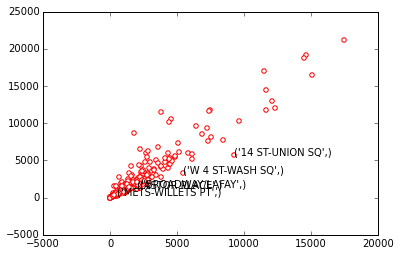

In [50]:
# plot weekend mean by weeknight mean

x = [x[1] for x in sorted(weekend_means.items())]
y = [y[1] for y in sorted(weeknight_means.items())]

plt.scatter(x, y, facecolors="white",
            edgecolors="red")

stations = [sta[0] for sta in sort_by_value(proportions)[:5]]

# station = ('METS-WILLETS PT',)
for station in stations:
    xcord = weekend_means[station]
    ycord = weeknight_means[station]
    print "%s: (%f, %f)" % (station, xcord, ycord)
    plt.annotate(station, (xcord, ycord))